## Seminar II: Numpy
October 14, 2025
_______________________

In [ ]:
# install requirements if needed

# !pip install numpy matplotlib pandas

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1 — Simulate a 1D array of simulated daily temperatures
* Use normal distribution with `mean = 15` and `sd = 25`
* Simulate 28 days of daily temperatures
* Save as temps object
* Convert the from Celsius to Fahrenheit and save as temps_fahrenheit
$$fahrenheit = 1.8 * celsius + 32$$

In [34]:
temps = np.random.normal(loc = 15, scale = 5,size = 28)

far_temps = temps*1.8 +32
far_temps


array([56.98751189, 43.23830358, 50.36672652, 70.71931557, 62.84661204,
       81.65232262, 67.32795572, 56.33816788, 43.88521603, 59.73265074,
       75.60660249, 67.3911506 , 59.69405172, 76.74529172, 57.51018126,
       53.77415778, 40.10553051, 50.22772291, 61.42256214, 53.86440348,
       56.56403743, 57.42222308, 54.44955653, 48.52448963, 55.87842063,
       68.86829858, 73.46569234, 66.41178036])

#### Print shape and dtype of temps

In [35]:
print(temps.shape)
print(temps.dtype)

(28,)
float64


#### Reshape temps so that it consists of 4 rows (weeks) and 7 columns (days of week)

In [36]:
temps = temps.reshape(4,7)
temps.shape

(4, 7)

####  Use slicing to display
* all Wednesday values (assume week starting on Monday) 
* Week #2
* 1st and 3rd week

* verify that all temperatures are higher than 5 degrees Celsius
* verify that all temperatures are lower than 30 degrees Celsius

In [37]:
weds = temps[:,2]
week_2 = temps[1,:]
temps.std()

5.704618911976741

In [38]:
temps

array([[13.88195105,  6.24350199, 10.20373696, 21.51073087, 17.13700669,
        27.58462368, 19.62664207],
       [13.52120438,  6.60289779, 15.40702819, 24.22589027, 19.66175033,
        15.38558429, 24.8584954 ],
       [14.17232292, 12.09675432,  4.50307251, 10.12651273, 16.34586786,
        12.14689082, 13.64668746],
       [14.12345727, 12.47197585,  9.18027202, 13.26578924, 20.4823881 ,
        23.03649575, 19.11765576]])

#### Print mean temperatures 
* Overall in Celsius and Fahrenheit
* For each day in Celsius
* For each week in Celsius

In [42]:
temps.mean()
far_temps.mean()

59.679319134895294

In [45]:
temps.mean(axis = 0)
temps.mean(axis = 1)


array([16.59831333, 17.09469295, 11.86258695, 15.95400485])

#### Plot both temperature series into 1 plot

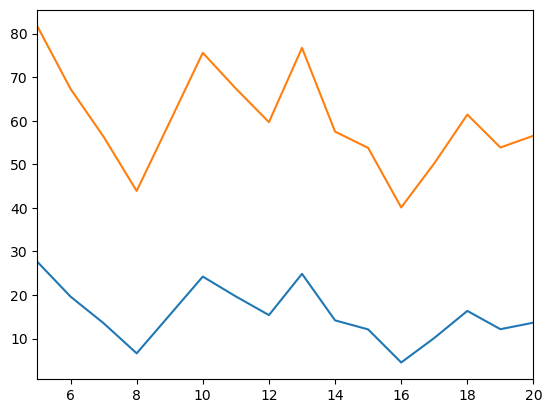

In [70]:
plt.figure()
plt.plot(temps.reshape(28))
plt.xlim(5,20)
plt.plot(far_temps)


### Exercise 2 - Simulate 2D array of artificial stock returns
* Simulate 1 year of data (252 observations) and 5 stocks
* Simulate from normal distribution with the defined means and standard deviations
* Compute sample mean and standard deviation for each of the assets

In [162]:
np.random.seed(523)
means = np.array([0, -0.01, 0, 0.005, .012])
sds   = np.array([0.01, 0.01, 0.01, 0.01, 0.01])



In [163]:
returns = np.random.normal(loc = means, scale = sds, size = (252,5))

returns.shape

(252, 5)

In [164]:
for i in range(returns.shape[1]):
    mean = returns[:,i].mean()
    stan_dev = returns[:,i].std()
    print(f'Mean of stock{i+1} is {mean}')
    print(f'STDV of stock{i+1} is {stan_dev}')

Mean of stock1 is 1.4132032785021259e-05
STDV of stock1 is 0.009625481529299497
Mean of stock2 is -0.010784930905477387
STDV of stock2 is 0.010696305177322637
Mean of stock3 is -0.0008335072366809808
STDV of stock3 is 0.009542853134806559
Mean of stock4 is 0.0041118111776869805
STDV of stock4 is 0.009746333819676184
Mean of stock5 is 0.012734194293314285
STDV of stock5 is 0.010462396597949309


#### Compute the correlation for each of the asset pairs

In [166]:
np.corrcoef(returns,rowvar = False) 

array([[ 1.        , -0.00201668,  0.0158186 ,  0.03593054, -0.02432926],
       [-0.00201668,  1.        ,  0.0180514 ,  0.04057639,  0.07921811],
       [ 0.0158186 ,  0.0180514 ,  1.        ,  0.02313868,  0.00685065],
       [ 0.03593054,  0.04057639,  0.02313868,  1.        ,  0.07810795],
       [-0.02432926,  0.07921811,  0.00685065,  0.07810795,  1.        ]])

#### Extract
* returns of the 2nd asset for Wednesdays (assume each week has 5 days and the sample starts Monday)
* all returns of stocks 1 and 4
  

In [167]:
returns

array([[ 0.00904925, -0.01224031,  0.00595433,  0.00513984,  0.00646023],
       [-0.00578244, -0.00795696, -0.01992026,  0.02107503,  0.03055087],
       [ 0.00857693, -0.01815639, -0.00898555,  0.00922171,  0.01338604],
       ...,
       [ 0.01265745, -0.00875772, -0.01153265,  0.01408358,  0.01723703],
       [ 0.0006743 , -0.0197201 , -0.00579779, -0.00822324,  0.00701914],
       [ 0.00361623, -0.02069303,  0.00706831,  0.0016559 ,  0.0177597 ]])

In [173]:
# returns[2::5,1].mean()
returns[2::5][:,1].mean()


-0.010193952424799526

#### Identify days where average return across assets is greater than 0

In [177]:
(returns.mean(axis = 1) > 0)

151

#### Plot the returns
* Plot the time series of raw returns
* Assume that you make an initial investment of 1 USD. Compute and plot the evolution of such investment for each asset.

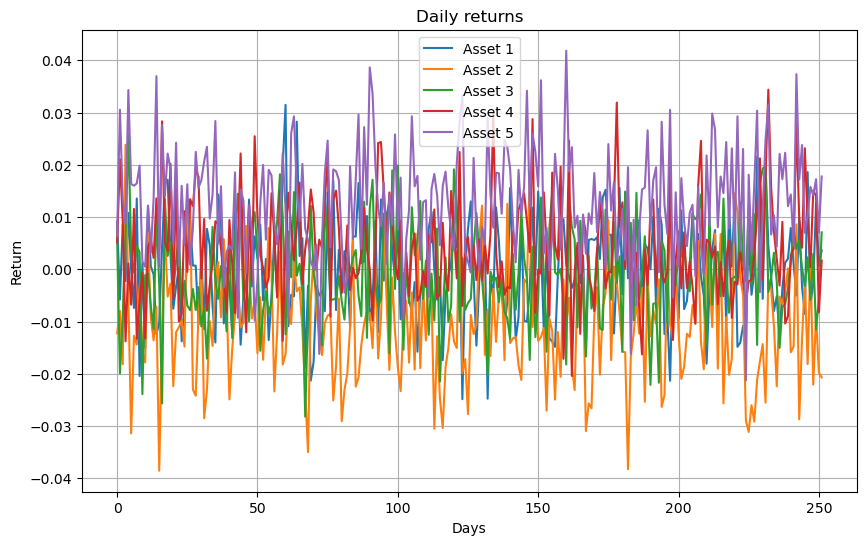

In [179]:
plt.figure(figsize=(10,6))
plt.plot(returns)
plt.title("Daily returns")
plt.xlabel("Days")
plt.ylabel("Return")
plt.legend([f"Asset {i+1}" for i in range(returns.shape[1])])
plt.grid(True)
plt.show()

Stock1 result would be 0.9919260913863519
Stock2 result would be 0.06410227485036035
Stock3 result would be 0.8012146120930869
Stock4 result would be 2.7793444895944672
Stock5 result would be 23.934152444413137


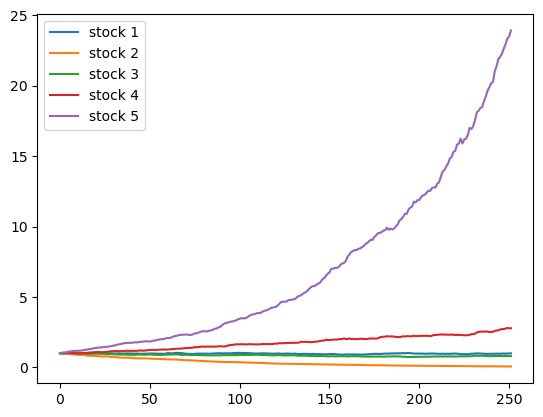

In [202]:
for i in range(returns.shape[1]):
    result = (returns[:,i] + 1).cumprod()
    print(f'Stock{i+1} result would be {result[-1]}')
    plt.plot(result,label = f'stock {i+1}')
plt.legend()


In [194]:
cum_returns = np.cumprod(1 + returns, axis=0)[251]


array([ 0.99192609,  0.06410227,  0.80121461,  2.77934449, 23.93415244])

#### Plot histogram of returns for asset 2

Text(0, 0.5, 'count')

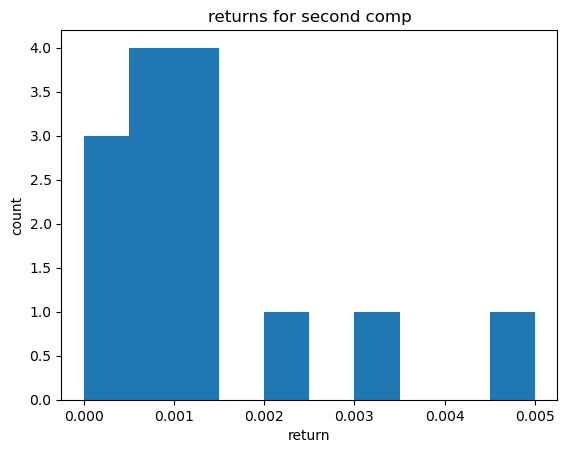

In [221]:
result_2 = (returns[:,1] + 1).cumprod()

plt.hist(returns[:,1],bins = 10,range = (0,0.005))
plt.title('returns for second comp')
plt.xlabel('return')
plt.ylabel('count')


---
### Exercise 3 — 3D array (image)

First we will load the image into a 3D array

(-0.5, 1279.5, 1023.5, -0.5)

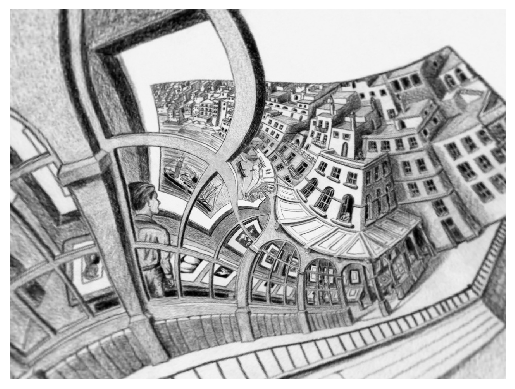

In [5]:
img = plt.imread(r"C:\Users\Hp\Desktop\data analysis in python\lec 3\mc_escher_print gallery.png")
plt.imshow(img, interpolation="nearest", aspect="auto")
plt.axis('off')

* Verify that all values are lower or equal than 1
* Find the range of realized values

In [13]:
# Verify that all the values are lower than 1
(img<=1).all()

True

In [12]:
print(img.max())

1.0


#### Remove each of the primary colors
* Create a copy of img and save it as img2
* Set all the values for `Red` to 0 and display the image
* Set all the values for `Green` to 0 and display the image
* Set all the values for `Blue` to 0 and display the image

(-0.5, 1279.5, 1023.5, -0.5)

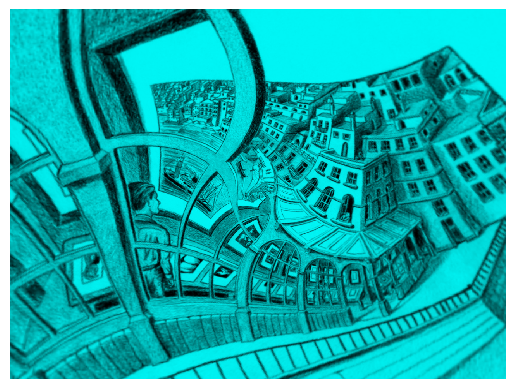

In [16]:
# remove red
img2 = img.copy()

img2[:,:,0] = 0
plt.imshow(img2, interpolation="nearest", aspect="auto")
plt.axis('off')

(-0.5, 1279.5, 1023.5, -0.5)

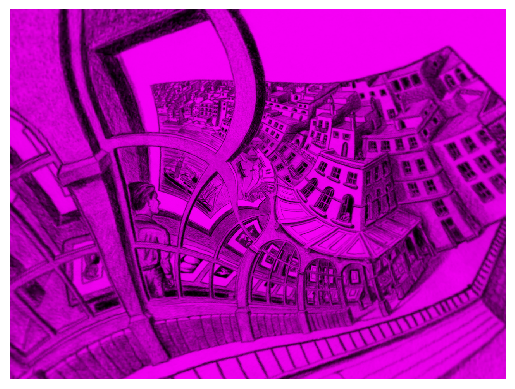

In [17]:
# remove green
# remove green
img2 = img.copy()

img2[:,:,1] = 0
plt.imshow(img2, interpolation="nearest", aspect="auto")
plt.axis('off')


(-0.5, 1279.5, 1023.5, -0.5)

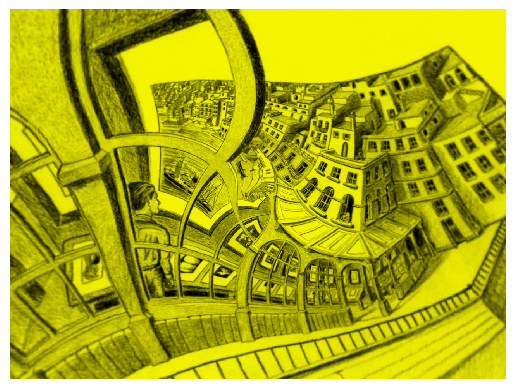

In [18]:
# remove blue
# remove blue
img2 = img.copy()

img2[:,:,2] = 0

plt.imshow(img2, interpolation="nearest", aspect="auto")
plt.axis('off')

#### Invert the grayscale of the image
* What was white should be black, etc.

(-0.5, 1279.5, 1023.5, -0.5)

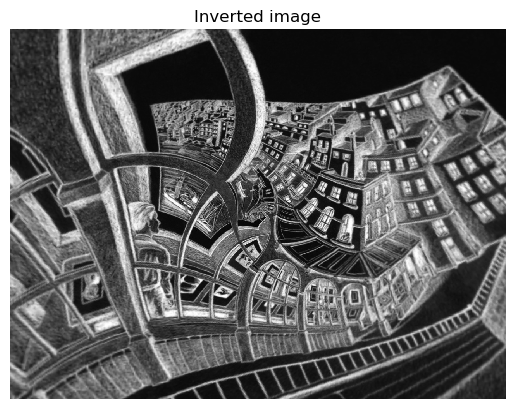

In [21]:
inverted_img = img.copy()
inverted_img[:,:,0:3] = 1 - inverted_img[:,:,0:3]

plt.imshow(inverted_img, interpolation="nearest", aspect="auto")
plt.title('Inverted image')
plt.axis('off')

#### Add Gaussian noise to the picture
* Create an np.array from normal distribution with `mean = 0` and `sd = 0.1` of shape (1024, 1280, 3), and add it to the RGB colors
* employ clipping of the values to the interval `[0, 1]`

(-0.5, 1279.5, 1023.5, -0.5)

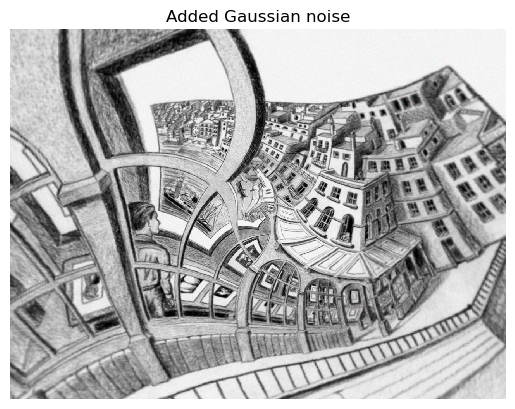

In [22]:
noisy = img.copy()

noise = np.random.normal(0, 0.01, size=img[..., :3].shape)  # mean 0, std 0.05
noisy[..., :3] = np.clip(noisy[..., :3] + noise, 0, 1)

plt.imshow(noisy, interpolation="nearest", aspect="auto")
plt.title('Added Gaussian noise')
plt.axis('off')


#### Flip the image horizontally

* You can use np.flip()
* Keep the `A` values

0.65485775 0.65486246


(-0.5, 1279.5, 1023.5, -0.5)

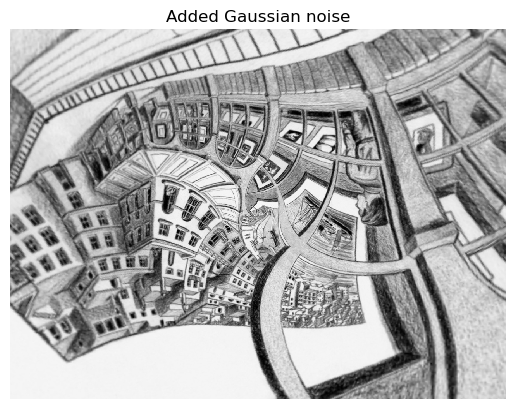

In [24]:
print(img[:,:,0].mean(), noisy[:,:,0].mean())
flipped_img = img.copy()
flipped_img = np.flip(flipped_img[..., 0:3])

plt.imshow(flipped_img, interpolation="nearest", aspect="auto")
plt.title('Added Gaussian noise')
plt.axis('off')

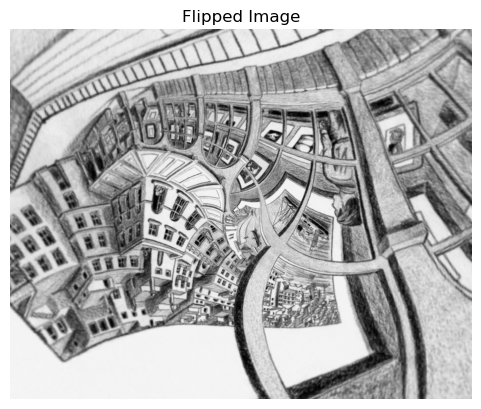

In [25]:
flipped_img = img.copy()
flipped_img = np.flip(flipped_img[..., 0:3])

alpha_channel = np.ones((*flipped_img.shape[:2], 1), dtype=flipped_img.dtype)
flipped_rgba = np.concatenate((flipped_img, alpha_channel), axis=2)

plt.imshow(flipped_rgba)
plt.title("Flipped Image")
plt.axis("off")
plt.show()

#### Flatten the image and then reconstruct it

In [26]:
flattened_img = img.flatten()
flattened_img.shape

(5242880,)

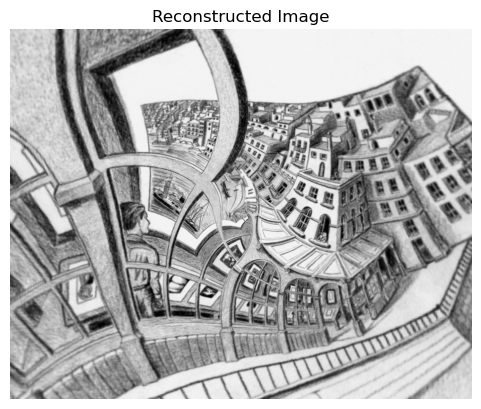

In [27]:
reconstructed_img = flattened_img.reshape(img.shape)

plt.imshow(reconstructed_img)
plt.title("Reconstructed Image")
plt.axis("off")
plt.show()

#### Bonus: create a checkerboard mask to selectively white every other 8×8 block.

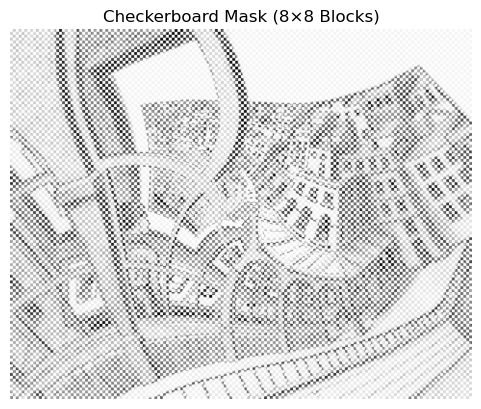

In [28]:
h, w, _ = img.shape
block = 8 

# Compute how many 8×8 blocks fit in each dimension
h_blocks = h // block
w_blocks = w // block

# Create a checkerboard pattern using addition mod 2
checker = (np.add.outer(np.arange(h_blocks), np.arange(w_blocks)) % 2).astype(bool)
mask = np.kron(checker, np.ones((block, block), dtype=bool))

# Apply mask: zero every other block
checker_img = img.copy()
checker_img[~mask] = 1  # zero RGBA pixels in the masked-out blocks

plt.imshow(checker_img)
plt.title("Checkerboard Mask (8×8 Blocks)")
plt.axis("off")
plt.show()